In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV

In [2]:
df_y = pd.read_csv('flight price predict_y.csv', sep=',')
df_y

,filghtId,price
0,252589,69244
1,223754,52392
2,243398,61933
3,208360,53164
4,247226,42521
...,...,...
5693,272654,61032
5694,294604,60260
5695,219483,51697
5696,287266,51707


In [3]:
df= pd.read_csv('flight price predict.csv', sep=',')
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32
...,...,...,...,...,...,...,...,...,...,...
5693,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3
5694,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24
5695,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8
5696,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42


In [4]:
df = df.merge(df_y)

In [5]:
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
5693,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3,61032
5694,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24,60260
5695,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8,51697
5696,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42,51707


In [6]:
#информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5698 entries, 0 to 5697
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filghtId          5698 non-null   int64  
 1   airline           5698 non-null   object 
 2   flight            5698 non-null   object 
 3   source_city       5698 non-null   object 
 4   departure_time    5698 non-null   object 
 5   stops             5698 non-null   object 
 6   arrival_time      5698 non-null   object 
 7   destination_city  5698 non-null   object 
 8   duration          5698 non-null   float64
 9   days_left         5698 non-null   int64  
 10  price             5698 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 534.2+ KB


In [7]:
#пропусков нет
df.isna().sum()

filghtId            0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
duration            0
days_left           0
price               0
dtype: int64

In [8]:
#найдено 0 дубликатов
df.duplicated().sum()

0

In [9]:
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
5693,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3,61032
5694,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24,60260
5695,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8,51697
5696,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42,51707


ТЕСТ НА НОРМАЛЬНОСТЬ РАСПРЕДЕЛЕНИЯ ЦЕНЫ НА АВИАБИЛЕТЫ

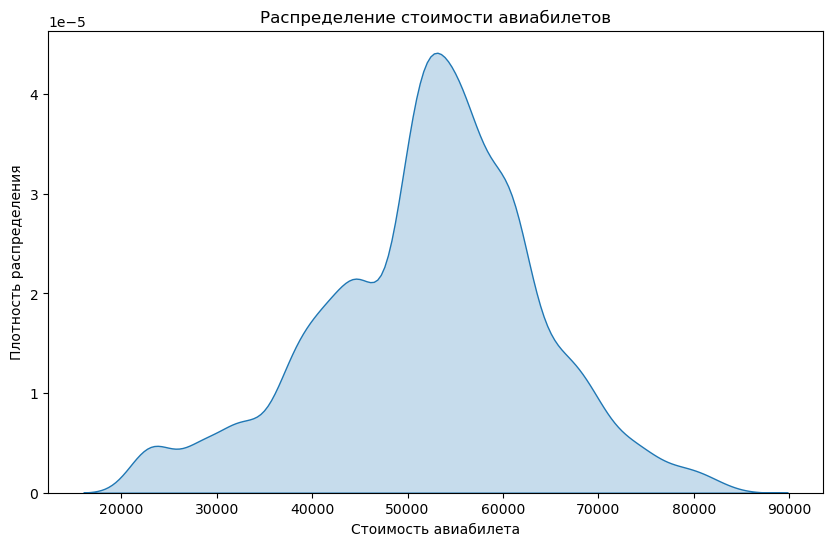

In [50]:
# зададим размер графика
plt.figure(figsize=(10,6))
 
# и построим график функции плотности
sns.kdeplot(df['price'], fill=True)
 
# добавим подписи
plt.xlabel('Стоимость авиабилета')
plt.ylabel('Плотность распределения')
plt.title('Распределение стоимости авиабилетов')
 
plt.show()

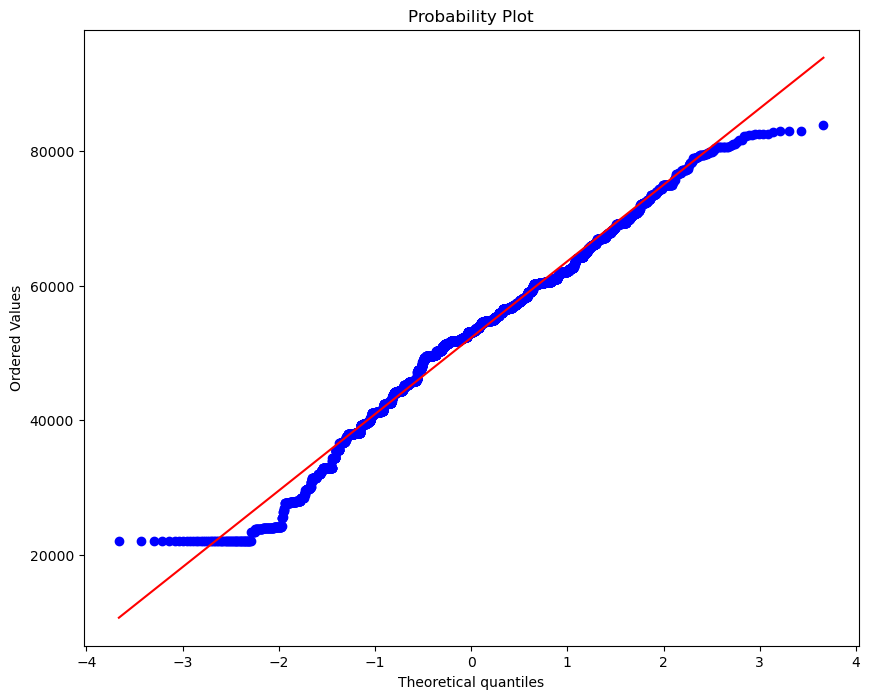

In [51]:
plt.figure(figsize=(10, 8))

# построение Q-Q plot 
# параметр dist='norm' указывает на сравнение данных с нормальным распределением
st.probplot(df['price'], dist='norm', plot=plt)
plt.show()

In [52]:
# тест Шапиро-Уилка на нормальность распределения
stat, p = st.shapiro(df['price'])

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

6.348260947102569e-23 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


C:\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### EDA:

В ходе исследования постараюсь ответить на следующие вопросы:

а) Изменяются ли цены в зависимости от авиакомпании?

б) Как влияет на цену покупка билетов всего за 1-2 дня до вылета?

в) Меняется ли цена билета в зависимости от времени отправления и прибытия?

г) Как меняется цена при изменении источника и места назначения?


### 1. Изменяются ли цены в зависимости от авиакомпании?

In [10]:
airline_price = df.groupby('airline')['price'].mean().sort_values()
airline_price

airline
AirAsia       3180.000000
Indigo        3855.250000
SpiceJet      5996.000000
GO_FIRST      7287.500000
Air_India    47428.446231
Vistara      54697.451002
Name: price, dtype: float64

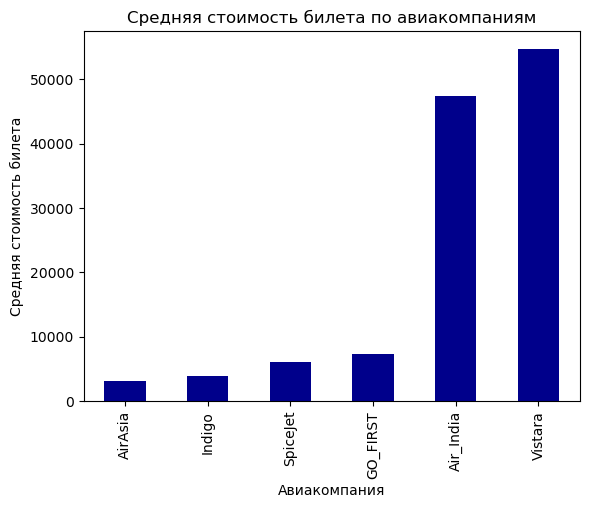

In [11]:
airline_price.plot(kind="bar",color='darkblue')
plt.xlabel("Авиакомпания")
plt.ylabel("Средняя стоимость билета")
plt.title("Средняя стоимость билета по авиакомпаниям")
plt.show()

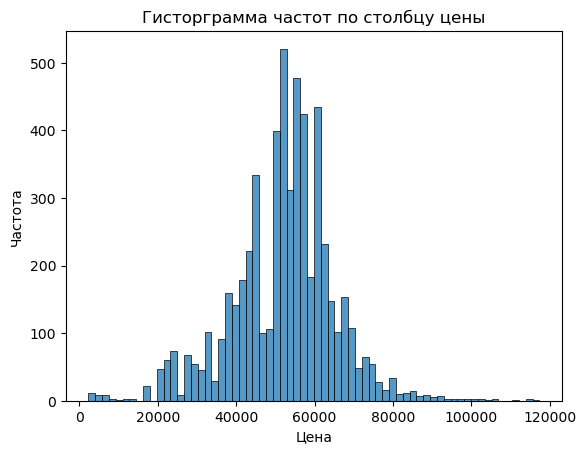

In [12]:
#построим гистограмму частот по стоимости билета
sns.histplot(data=df['price']).set(title='Гисторграмма частот по столбцу цены', ylabel='Частота',
                                                                               xlabel='Цена')
plt.show()

<AxesSubplot:>

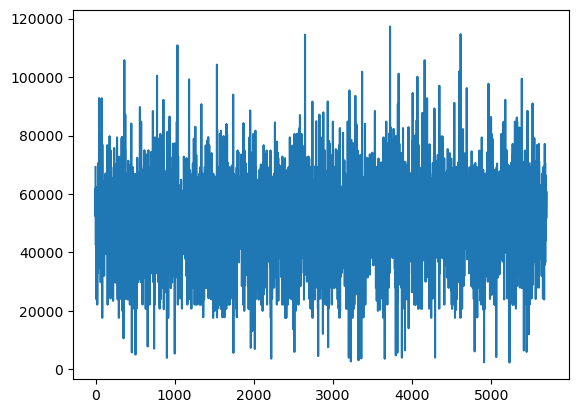

In [13]:
df['price'].plot()

In [14]:
#посмотрим основные характеристики этого слобца
df['price'].describe()

count      5698.000000
mean      52037.046508
std       13100.508085
min        2339.000000
25%       44583.000000
50%       53164.000000
75%       60260.000000
max      117307.000000
Name: price, dtype: float64

<AxesSubplot:>

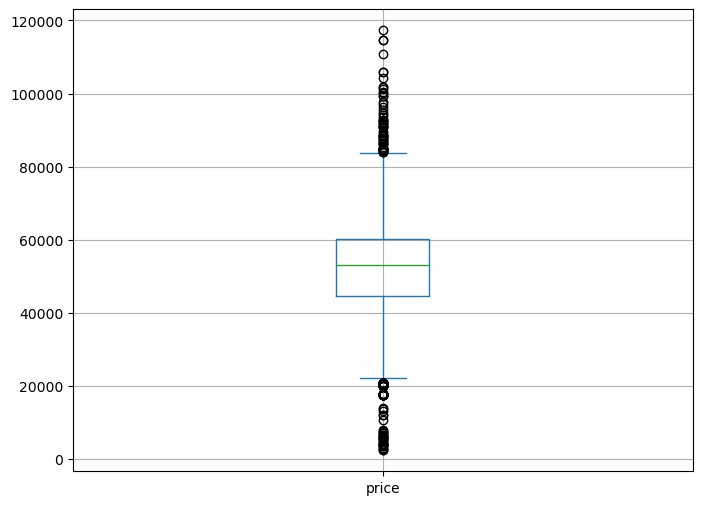

In [15]:
#построим график boxplot для того, чтобы проверить наличие выбросов
df['price'].plot(kind='box', figsize=(8, 6), grid=True)

In [16]:
#найдем границы усов
q75 = np.percentile(df['price'], 75)
q25 = np.percentile(df['price'], 25) 
iqr = q75 - q25
ejection_h = q75+iqr*1.5
ejection_l = q25-iqr*1.5
print (ejection_h, ejection_l)
#нижняя граница - значительно выше минимальной стоимости билета

83775.5 21067.5


In [17]:
#определим число выбросов
n_ejection = df['price'][(df['price'] >= ejection_h)|(df['price'] <= ejection_l)].count()
print('Число выбросов:', n_ejection)

Число выбросов: 170


По приведенной ранее гистограмме цен по авикомпаниям мы видим, что средняя цена билетов в авиакомпаниях AirAsia = 3180.0, Indigo = 3855.25, SpiceJet = 5996.0, GO_FIRST = 7287.5.

In [18]:
airline_top = df.groupby('airline')['price'].count().sort_values()
airline_top

airline
AirAsia         3
SpiceJet        3
GO_FIRST        4
Indigo          4
Air_India    1990
Vistara      3694
Name: price, dtype: int64

Как видно, по этим авиакомпаниям зарегистрировано очень мало билетов.

Text(0.5, 1.0, 'Число купленных билетов по авиакомпаниям')

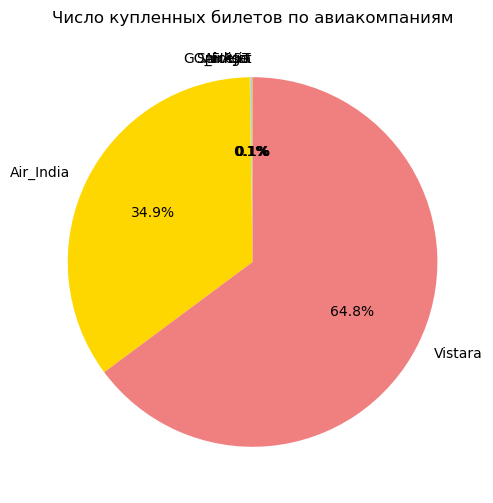

In [19]:
plt.figure(figsize=(6, 6))
plt.pie(airline_top, labels=['AirAsia','SpiceJet','GO_FIRST','Indigo','Air_India','Vistara'], autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title("Число купленных билетов по авиакомпаниям")

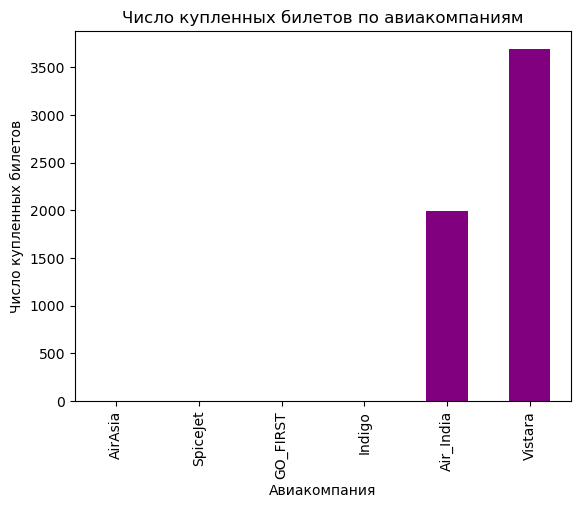

In [20]:
airline_top.plot(kind="bar",color='purple')
plt.xlabel("Авиакомпания")
plt.ylabel("Число купленных билетов")
plt.title("Число купленных билетов по авиакомпаниям")
plt.show()

Как видно по графикам, на две самые популярные авиакомпании приходится более 98% всех купленных билетов, при этом средняя стоимость билетов в данных авиакомпаниях самая высокая.

In [21]:
#Удалим выбросы:
df = df[(df['price'] <= ejection_h)&(df['price'] >= ejection_l)]
df = df.reset_index(drop=True)
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
5523,272654,Air_India,AI-402,Kolkata,Morning,one,Night,Chennai,13.17,3,61032
5524,294604,Air_India,AI-539,Chennai,Evening,one,Morning,Bangalore,15.92,24,60260
5525,219483,Vistara,UK-981,Delhi,Night,one,Night,Hyderabad,23.08,8,51697
5526,287266,Vistara,UK-830,Hyderabad,Morning,one,Morning,Chennai,23.58,42,51707


In [22]:
df['airline'].unique()

array(['Vistara', 'Air_India'], dtype=object)

И после удаления выбросов, информация о них исчезла.

### Как влияет на цену покупка билетов всего за 1-2 дня до вылета?

In [23]:
day_price = df.groupby('days_left')['price'].mean()
day_price

days_left
1     62650.555556
2     56176.190476
3     57177.338028
4     54890.801980
5     53547.742857
6     51382.371134
7     54075.495935
8     53396.062016
9     51550.440367
10    55479.271930
11    51176.973214
12    50526.504065
13    51685.556522
14    51470.126126
15    52204.715517
16    51700.160000
17    52924.660000
18    52084.613208
19    51851.118110
20    53280.184211
21    52781.855856
22    51642.965217
23    51735.889764
24    52967.473282
25    51997.903226
26    50256.567010
27    51757.435115
28    52293.714286
29    51948.576271
30    52834.279070
31    51925.593750
32    51344.398496
33    51097.243243
34    52017.338710
35    52560.481132
36    52413.680272
37    53178.733333
38    52256.858491
39    51183.968254
40    51878.520325
41    52688.375000
42    49379.759690
43    51726.103175
44    51021.587629
45    51726.091743
46    51115.347458
47    51375.347368
48    52288.851485
49    51504.898990
Name: price, dtype: float64

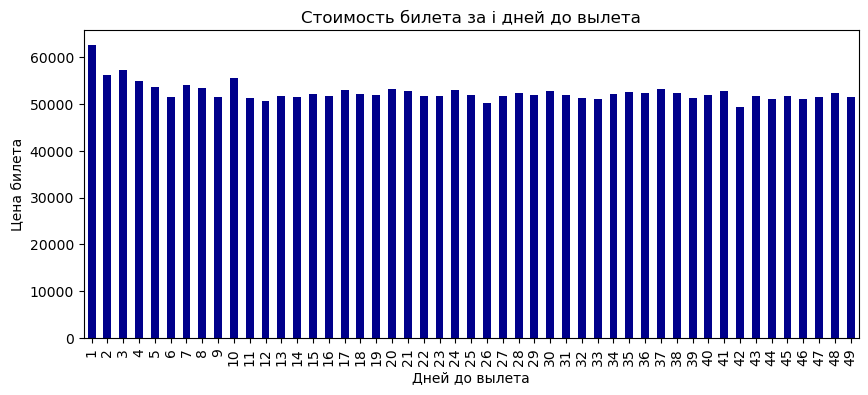

In [24]:
plt.figure(figsize=(10, 4))
day_price.plot(kind="bar",color='darkblue')
plt.xlabel("Дней до вылета")
plt.ylabel("Цена билета")
plt.title("Стоимость билета за i дней до вылета")
plt.show()

Как видно, билеты купленный за день до поездки в среднем имеют самую высокую стоимость. Однако, как видно по графику, в целом средняя цена как за месяц до вылета, там и за несколько дней не сильно отличаются.

### 3.Меняется ли цена билета в зависимости от времени отправления и прибытия?

In [25]:
departure_time = df.groupby('departure_time')['price'].mean()
departure_time

departure_time
Afternoon        51008.950549
Early_Morning    52382.903974
Evening          52532.868377
Late_Night       49868.000000
Morning          52628.121809
Night            52150.887129
Name: price, dtype: float64

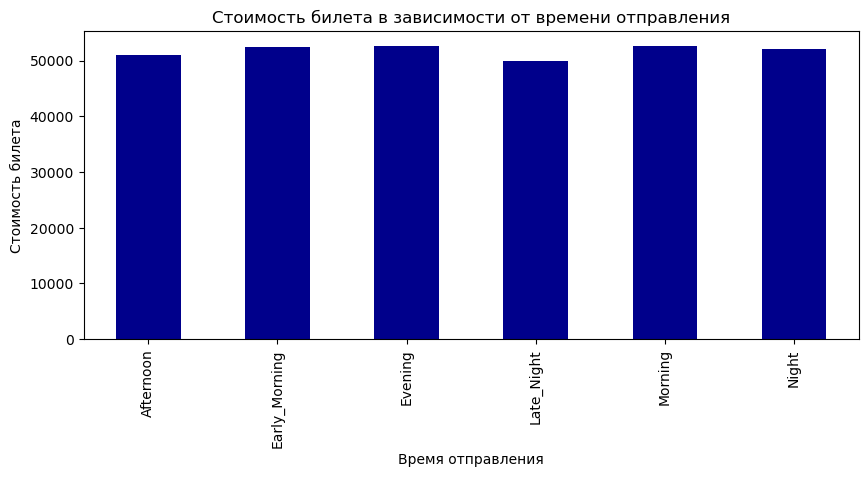

In [26]:
plt.figure(figsize=(10, 4))
departure_time.plot(kind="bar",color='darkblue')
plt.xlabel("Время отправления")
plt.ylabel("Стоимость билета")
plt.title("Стоимость билета в зависимости от времени отправления")
plt.show()

In [27]:
arrival_time = df.groupby('arrival_time')['price'].mean()
arrival_time

arrival_time
Afternoon        48885.278034
Early_Morning    48650.636364
Evening          53210.780645
Late_Night       52366.137097
Morning          51672.920499
Night            53561.176471
Name: price, dtype: float64

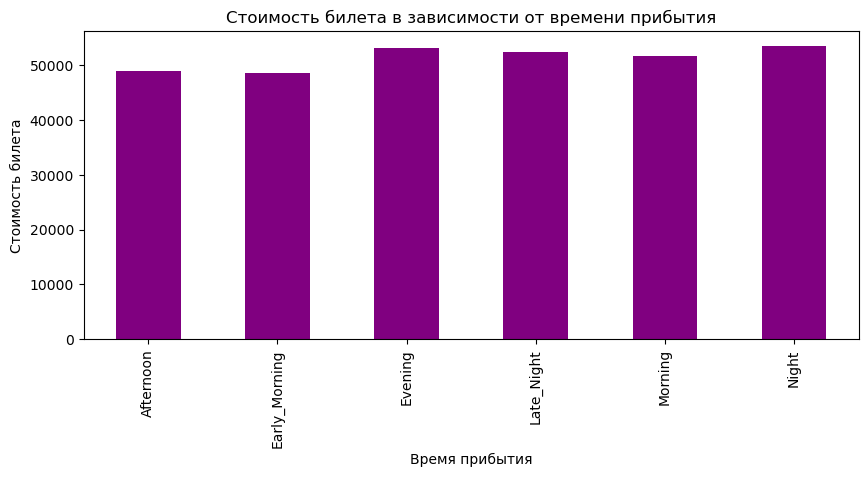

In [28]:
plt.figure(figsize=(10, 4))
arrival_time.plot(kind="bar",color='purple')
plt.xlabel("Время прибытия")
plt.ylabel("Стоимость билета")
plt.title("Стоимость билета в зависимости от времени прибытия")
plt.show()

1. Проверим гипотезу об отличиях средней стоимости билета в зависимости от времени отправления. 
2. Построим график boxplot

Разделим рейсы на две группы: вечернее и утреннее время + обед и вечер.

H0: Средяя стоимость билета в ночное и утреннее время не отличается от стомости билета в обеденное и вечернее время.

H1: Средяя стоимость билета в ночное и утреннее время  отличается от стомости билета в обеденное и вечернее время.

In [43]:
import random
sample_1 = df[df['arrival_time'] == 'Morning']['price'].tolist() + df[df['arrival_time'] == 'Early_Morning']['price'].tolist()+df[df['arrival_time'] == 'Night']['price'].tolist() + df[df['arrival_time'] == 'Late_Night']['price'].tolist()
sample_1 = random.sample(sample_1, 1000)

In [44]:
sample_2 = df[df['arrival_time'] == 'Afternoon']['price'].tolist() + df[df['arrival_time'] == 'Evening']['price'].tolist()
sample_2 = random.sample(sample_2, 1000)

In [53]:
# тест Шапиро-Уилка на нормальность распределения
stat, p = st.shapiro(sample_1)

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

8.402416824537795e-06 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


In [54]:
# тест Шапиро-Уилка на нормальность распределения
stat, p = st.shapiro(sample_2)

alpha = 0.05
if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу. Выборка имеет нормальное распределение')

2.933908324620482e-11 Отвергаем нулевую гипотезу. Выборка НЕ имеет нормального распределения


In [45]:
print(np.mean(sample_1))
print(np.mean(sample_2))

52493.755
51869.738


In [55]:
alpha = 0.05 # уровень статистической значимости
         
# проводим тест Уилкоксона-Манна-Уитни для сравнения двух независимых выборок
results = st.mannwhitneyu(sample_1, sample_2)

print('p-value:', results.pvalue)

# формулируем результаты
if results.pvalue < alpha:
    print('Отклоняем нулевуюю гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.596743786156094
Нет оснований отклонить нулевую гипотезу


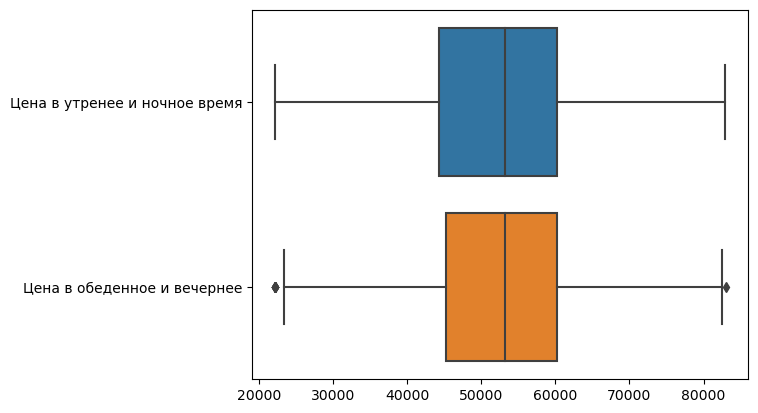

In [56]:
data = pd.DataFrame({'Цена в утренее и ночное время' : sample_1, 'Цена в обеденное и вечернее' : sample_2})
sns.boxplot(data=data, orient='h')
plt.show()


Как видно, в целом средняя стоимость билета от времени прибытия никак не зависит, вариация незначительная.

### 4.Как меняется цена при изменении источника и места назначения?

In [29]:
df['from_to'] = df['source_city'] + ' to ' + df['destination_city']

In [18]:
from_to = df.groupby('from_to')['price'].mean().sort_values()
from_to

from_to
Delhi to Hyderabad        43169.246914
Hyderabad to Delhi        43649.934132
Mumbai to Delhi           44174.871622
Delhi to Mumbai           44550.781065
Bangalore to Delhi        48145.540741
Delhi to Bangalore        48238.356863
Hyderabad to Bangalore    49046.180723
Bangalore to Hyderabad    49367.270833
Hyderabad to Chennai      49768.484615
Delhi to Chennai          50154.864407
Mumbai to Hyderabad       50515.413043
Chennai to Hyderabad      51358.394958
Chennai to Delhi          52030.915033
Bangalore to Chennai      52037.226027
Chennai to Bangalore      52570.954545
Hyderabad to Mumbai       53056.095808
Hyderabad to Kolkata      53347.406897
Kolkata to Hyderabad      54192.021127
Mumbai to Kolkata         54513.293023
Delhi to Kolkata          54708.257895
Kolkata to Mumbai         55814.925926
Mumbai to Chennai         55972.747664
Kolkata to Delhi          56191.760870
Kolkata to Chennai        56505.762712
Chennai to Kolkata        56726.109489
Chennai to Mumbai

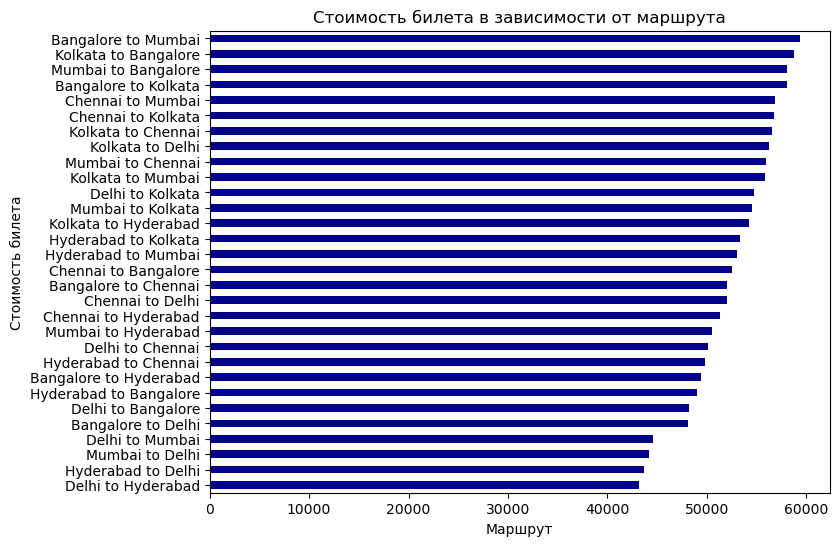

In [19]:
plt.figure(figsize=(8, 6))
from_to.plot(kind="barh",color='darkblue')
plt.xlabel("Маршрут")
plt.ylabel("Стоимость билета")
plt.title("Стоимость билета в зависимости от маршрута")
plt.show()

Как видно, самая высокая стоимость билета наблюдается по маршруту Bangalore to Mumbai, а самая дешевая - Delhi to Hyderabad.     

### Влияет ли продолжительность маршрута на среднюю стоимость билета?

In [20]:
duration = df.groupby('duration')['price'].mean().sort_values()
duration

duration
1.25     12057.000000
1.50     17623.000000
1.42     17794.000000
1.58     19096.444444
1.67     19702.000000
             ...     
9.67     66436.454545
6.92     66477.000000
28.42    66687.500000
32.00    67710.000000
27.42    78316.000000
Name: price, Length: 333, dtype: float64

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

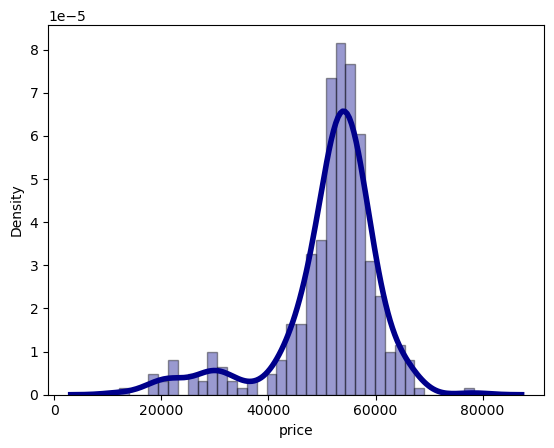

In [21]:
sns.distplot(duration, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Зависимость определенно есть, чем длительнее маршрут, тем выше стоимость.

### Влияет ли число остановок на стоимость билета?

In [22]:
stops = df.groupby('stops')['price'].mean().sort_values()
stops

stops
zero           27967.545825
one            54152.551563
two_or_more    67992.034483
Name: price, dtype: float64

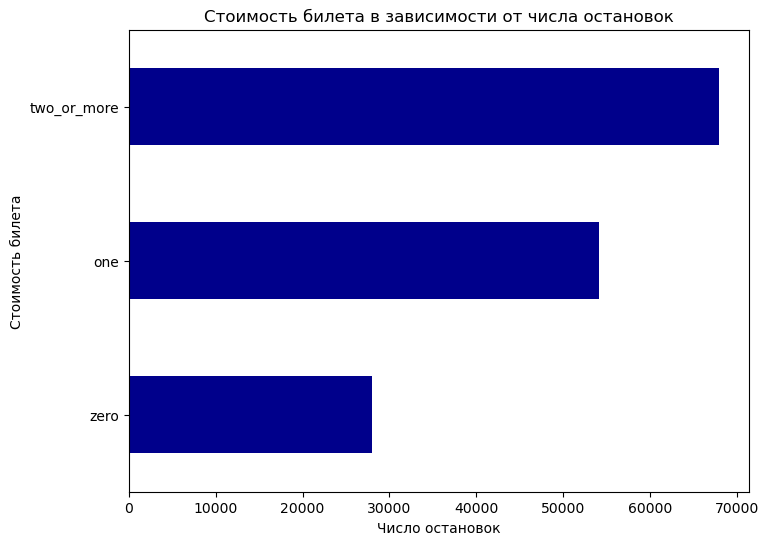

In [23]:
plt.figure(figsize=(8, 6))
stops.plot(kind="barh",color='darkblue')
plt.xlabel("Число остановок")
plt.ylabel("Стоимость билета")
plt.title("Стоимость билета в зависимости от числа остановок")
plt.show()

Зависимость тоже вполне ясна, чем больше остановок, тем в среднем выше стоимость билета.

### Влияет ли на стоимость билета рейс, на который он куплен?

In [24]:
flight = df.groupby('flight')['price'].mean().sort_values()
flight

flight
6E-296      2339.000000
6E-5001     2410.000000
I5-1621     2723.000000
I5-798      3090.000000
I5-547      3727.000000
               ...     
UK-847     66098.000000
UK-811     66161.076923
UK-940     67167.787879
UK-996     67468.466667
UK-613     68375.000000
Name: price, Length: 283, dtype: float64

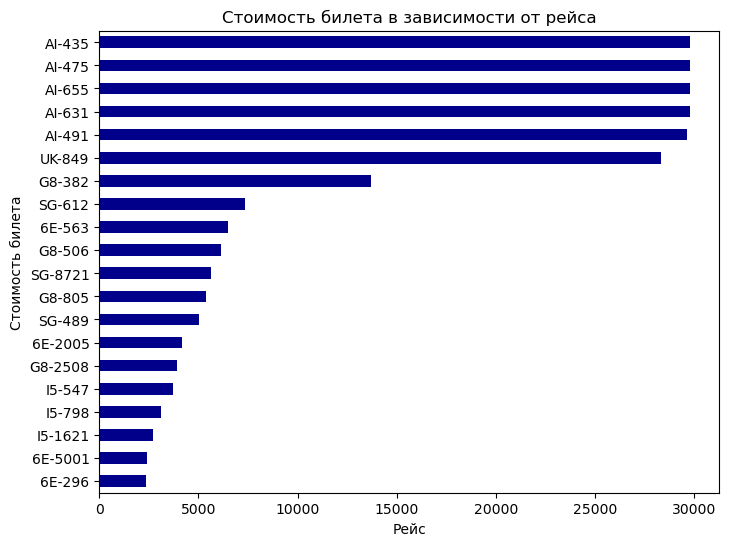

In [25]:
plt.figure(figsize=(8, 6))
flight.head(20).plot(kind="barh",color='darkblue')
plt.xlabel("Рейс")
plt.ylabel("Стоимость билета")
plt.title("Стоимость билета в зависимости от рейса")
plt.show()

Вывела топ 20. Как видно, зависимость есть.

Таким образом, в результате первоначального анализа мы выявили, что рейс, число остановок, продолжительность перелета и выбранная авиакомпания оказывают влияние на формирование стоимости билета. Все остальные факторы не оказывают практически никакого влияния. Будем руководствоваться этими выводами для построения прогнозной модели.

### Построение прогнозной модели.

Целевое кодирование, также известное как правдоподобное кодирование, представляет собой метод кодирования категориальных признаков, при котором каждая категория заменяется средним значением (или медианой) целевой переменной для этой категории. Другими словами, мы используем целевую переменную для кодирования категорий категориального признака. Преимущество целевого кодирования заключается в том, что оно может более точно фиксировать взаимосвязь между категориальным признаком и целевой переменной, чем горячее кодирование, особенно когда категориальный признак имеет большое количество категорий. Целевое кодирование также может уменьшить размерность пространства признаков.

In [65]:
cat_cols = list(df.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 8
Categorical columns:
['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'from_to']


In [66]:
import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
df = te.fit_transform(df, df['price'])
df

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,from_to
0,252589,54697.451002,60811.605810,53366.581351,51877.791667,54152.551563,53388.003971,52903.346051,13.25,46,69244,59371.030829
1,223754,54697.451002,53212.185003,47793.532086,52719.203966,54152.551563,53540.326169,52981.652229,10.42,31,52392,50154.864693
2,243398,54697.451002,60465.088544,52254.607407,51715.665706,54152.551563,51229.746606,52981.652229,13.00,28,61933,55972.747649
3,208360,54697.451002,51401.579209,47793.532086,52719.203966,54152.551563,53388.003971,52903.346051,12.67,17,53164,44550.781065
4,247226,54697.451002,49260.155417,53366.581351,52460.447030,54152.551563,51229.746606,47929.482422,13.67,32,42521,48145.540741
...,...,...,...,...,...,...,...,...,...,...,...,...
5693,272654,47428.446231,54599.940503,56365.950820,52719.203966,54152.551563,53388.003971,52981.652229,13.17,3,61032,56505.514928
5694,294604,47428.446231,55228.462487,54056.703504,52460.447030,54152.551563,51229.746606,53411.887574,15.92,24,60260,52570.953737
5695,219483,54697.451002,54954.706422,47793.532086,51715.665706,54152.551563,53388.003971,49582.715976,23.08,8,51697,43169.252951
5696,287266,54697.451002,53219.096319,49673.354839,52719.203966,54152.551563,51229.746606,52981.652229,23.58,42,51707,49768.522504


df["stops"] = df["stops"].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)
df["airline"] = df["airline"].replace({'Vistara': 0, 'Air_India': 1}).astype(int)
df["source_city"] = df["source_city"].replace({'Mumbai': 0, 'Delhi': 1,'Bangalore': 2, 'Kolkata': 3,'Hyderabad': 4,'Chennai': 5}).astype(int)
df["departure_time"] = df["departure_time"].replace({'Early_Morning': 0, 'Morning': 1,'Afternoon': 2, 'Evening': 3,'Night': 4,'Late_Night': 5}).astype(int)
df["arrival_time"] = df["arrival_time"].replace({'Early_Morning': 0, 'Morning': 1,'Afternoon': 2, 'Evening': 3,'Night': 4,'Late_Night': 5}).astype(int)
df["destination_city"] = df["destination_city"].replace({'Mumbai': 0, 'Delhi': 1,'Bangalore': 2, 'Kolkata': 3,'Hyderabad': 4,'Chennai': 5}).astype(int)

df["flight"] = df["flight"].astype('category')
df["flight"]= df["flight"].cat.codes
df

df["from_to"] = df["from_to"].astype('category')
df["from_to"]= df["from_to"].cat.codes
df

In [67]:
print(df['days_left'].max())
print(df['days_left'].min()) 

49
1


#инженерия признаков
def recency(duration):
    
    if duration <= 5:
        return 0
    elif  5 < duration <= 10:
        return 1
    elif 10 < duration <= 15:
        return 2
    elif  15 < duration <= 20:
        return 3
    elif 20 < duration <= 25:
        return 4
    elif  25 < duration <= 30:
        return 5
    elif 30 < duration <= 35:
        return 6
    else:
        return 7
df['duration'] = df['duration'].apply(recency) #с помощью apply применяем функцию к стобцу 
df

#проверим зависимость между длиной маршрута и ценой на билет
def recency(days_left):
    
    if days_left <= 2:
        return 0
    elif  2 < days_left <= 7:
        return 1
    elif 7 < days_left <= 30:
        return 2
    else:
        return 3
df['days_left'] = df['days_left'].apply(recency) #с помощью apply применяем функцию к стобцу 
df

Теперь можем приступить к построению модели прогноза.

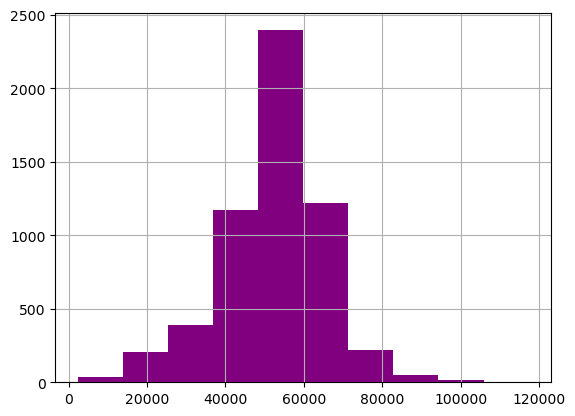

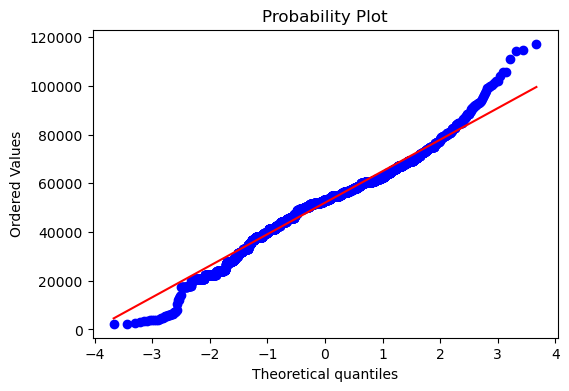

In [68]:
df['price'].hist( color='purple')
plt.figure(figsize=(6, 4))
# построение Q-Q plot 
st.probplot(df['price'], dist='norm', plot=plt)
plt.show()

Данные не имеют нормального распределения. Построение модели линейной регрессии не удачный вариант.

<AxesSubplot:>

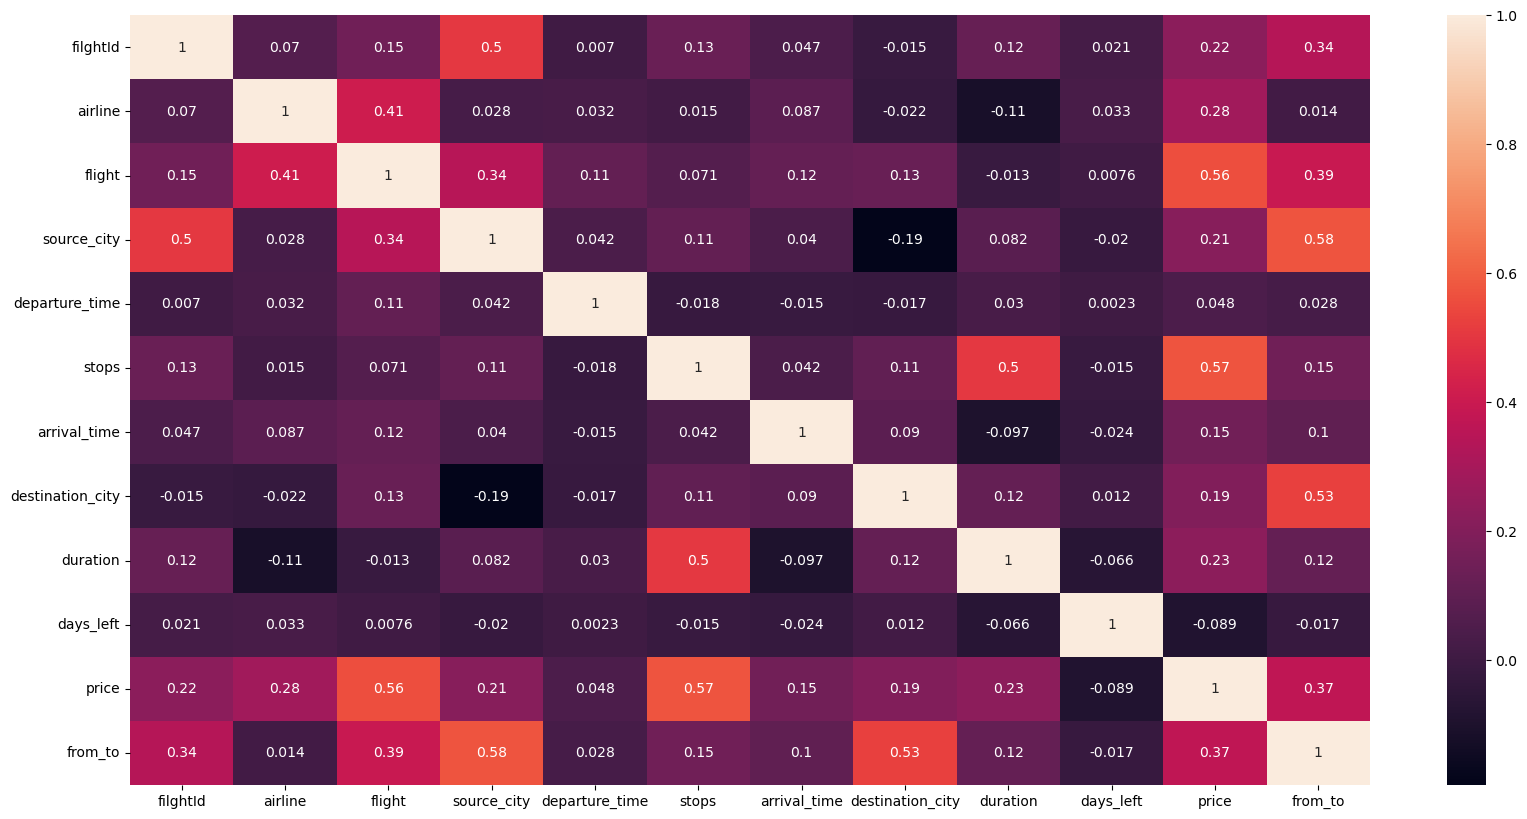

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Между факторами видна мультиколлинеарность.

Построим линейную регрессию по сырым данным.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

Масштабирование набора данных.Масштабирование - это этап предварительной обработки в машинном обучении, целью которого является стандартизация диапазона или масштаба входных объектов. Цель масштабирования - обеспечить, чтобы каждая функция имела одинаковый масштаб или диапазон, что может помочь некоторым моделям машинного обучения быстрее сходиться и повышать их производительность.

Выбор метода масштабирования зависит от распределения и диапазона входных характеристик, а также от конкретной используемой модели машинного обучения. В целом, рекомендуется масштабировать данные перед обучением модели машинного обучения, если только не известно, что модель нечувствительна к масштабу входных объектов.

Одним из наиболее часто используемых методов масштабирования является MinMaxScaler, который масштабирует данные до фиксированного диапазона значений от 0 до 1. Он работает путем вычитания минимального значения каждого признака и последующего деления на диапазон (то есть разницу между максимальным и минимальным значениями).

In [71]:
y = df[['price']]
scaler = StandardScaler().fit_transform(df.drop(["price",'destination_city','source_city'], axis=1))
X = pd.DataFrame(scaler)

<AxesSubplot:>

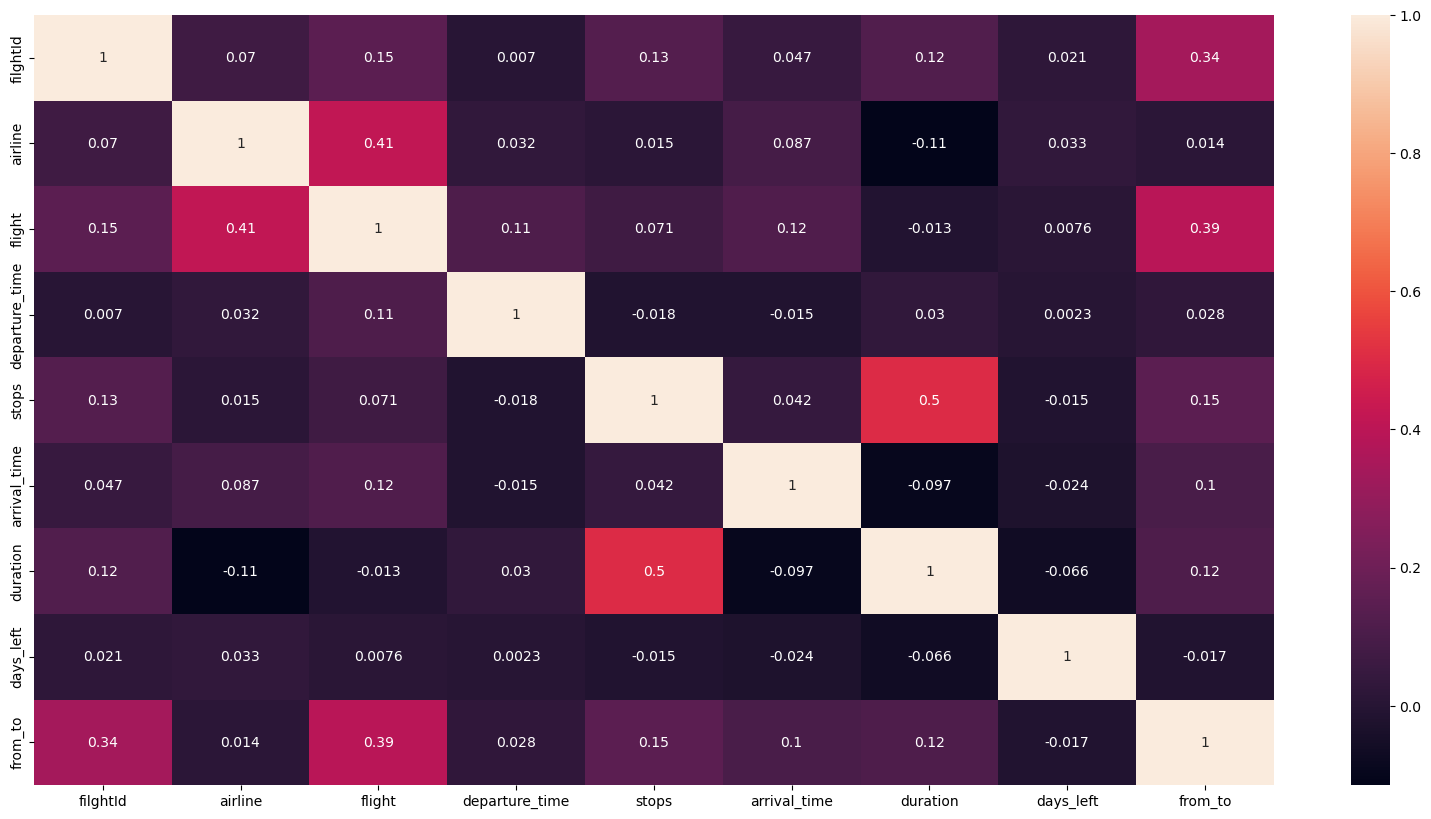

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(df.drop(["price",'destination_city','source_city'], axis=1).corr(),annot=True)

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

In [74]:
# создадим объект этого класса и запишем в переменную model
model_1 = LinearRegression()

# обучим нашу модель
model_1.fit(train_X, train_y)
print(model_1.coef_, model_1.intercept_)
predictions = model_1.predict(test_X)

[[  637.99638666  1160.60771521  5545.7332702    144.29140296
   7069.3968359    700.57066476  -531.8414108  -1170.41335255
   1308.84743121]] [51943.5247064]


In [75]:
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 63594269.254566014
Среднеквадратическая ошибка (RMSE): 7974.601510706727
Средняя абсолютная ошибка  (MAPE): 15.21 %
Коэффициент детерминации (R^2): 0.6276571490992582


Попробуем отобрать факторы с помощью метода Пермутационной важности.

In [76]:
import eli5
from eli5.sklearn import PermutationImportance

In [77]:
reg = LinearRegression().fit(train_X, train_y)

In [78]:
perm = PermutationImportance(reg, random_state=42).fit(test_X, test_y)

In [79]:
eli5.show_weights(perm, feature_names=list(df.drop(["price",'destination_city','source_city'], axis=1).columns))

Weight,Feature
0.5793 ± 0.0483,stops
0.3801 ± 0.0151,flight
0.0195 ± 0.0052,from_to
0.0171 ± 0.0024,airline
0.0156 ± 0.0060,days_left
0.0070 ± 0.0018,filghtId
0.0052 ± 0.0026,duration
0.0051 ± 0.0029,arrival_time
-0.0001 ± 0.0007,departure_time


Как видно, число пересадок и наименование авиакомпании наиболее сильно влияют на построение модели. В целом ранжирование факторов соответствует результатам EDA, который был проведен ранее.

In [80]:
scaler = MinMaxScaler().fit_transform(df.drop(["price",'filghtId','source_city','destination_city','days_left','departure_time','arrival_time'], axis=1))
X2 = pd.DataFrame(scaler)
y2 = df[['price']]
train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, y2, test_size=0.33, random_state=0)


In [81]:
# создадим объект этого класса и запишем в переменную model
model_2 = LinearRegression()

# обучим нашу модель
model_2.fit(train_X2, train_y2)
print(model_2.coef_, model_2.intercept_)
predictions2 = model_2.predict(test_X2)

[[ 3727.33753242 26747.7819812  37778.67066706 -3322.09295186
   5285.85597897]] [11064.88413702]


In [82]:
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
mse = mean_squared_error(test_y2, predictions2)
rmse = mean_squared_error(test_y2, predictions2, squared=False)
mape = mean_absolute_percentage_error(test_y2, predictions2)
r2 = r2_score(test_y2, predictions2)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 65970238.31755476
Среднеквадратическая ошибка (RMSE): 8122.206493161495
Средняя абсолютная ошибка  (MAPE): 15.71 %
Коэффициент детерминации (R^2): 0.6137459098486919


Как видно, детерминация стала еще ниже. Это происходит потому что большая часть переменных - закодированные данные, а показатель, который нужно спрогнозировать имеет много вариаций значений. Так, отбор факторов не решает проблемы с низким качеством модели.

In [83]:
prediction = []
for i in range(len(predictions)):
    prediction.append(float(predictions[i]))

In [84]:
pred = pd.DataFrame({"y_test":test_y['price'].tolist(), "y_pred":prediction})
pred

,y_test,y_pred
0,89257,57639.815462
1,24234,32568.524979
2,43729,49900.963332
3,54777,53034.941523
4,34460,35421.924722
...,...,...
1876,27864,25003.036458
1877,39377,42038.907782
1878,39432,48694.065252
1879,64285,66606.057486


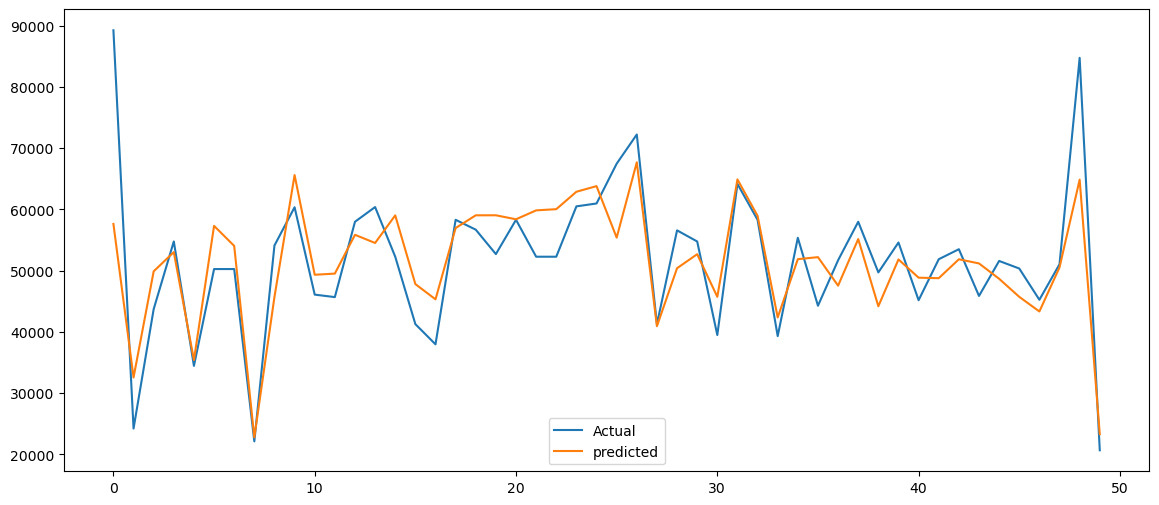

In [85]:
plt.figure(figsize=(14,6))
plt.plot(pred[:50])
plt.legend(['Actual' , 'predicted'])

Как видно, линейная модель регрессии плохо предсказывает значения. Попробуем метод xgboost.

In [86]:
import xgboost
xgb = xgboost.XGBRegressor(booster='gbtree', learning_rate=0.05, n_estimators = 500, seed = 42)
xgb.fit(train_X,train_y,early_stopping_rounds=5,eval_set=[(test_X, test_y)],verbose=False)
print('train score',xgb.score(train_X
                              ,train_y))
print('test score',xgb.score(test_X,test_y))
y_pred = xgb.predict(test_X)
mse = mean_squared_error(test_y,y_pred)
rmse = mean_squared_error(test_y,y_pred, squared=False)
mape = mean_absolute_percentage_error(test_y,y_pred)
r2 = r2_score(test_y,y_pred)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

C:\anaconda\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


train score 0.8969082614309019
test score 0.8041925927252317
Среднеквадратическая ошибка (MSE): 33442911.419264935
Среднеквадратическая ошибка (RMSE): 5782.984646293377
Средняя абсолютная ошибка  (MAPE): 7.55 %
Коэффициент детерминации (R^2): 0.8041925927252317


In [87]:
pred_xgb = pd.DataFrame({"y_test":test_y['price'].tolist(), "y_pred":y_pred.tolist()})
pred_xgb

,y_test,y_pred
0,89257,67473.640625
1,24234,28013.759766
2,43729,41908.207031
3,54777,55472.457031
4,34460,36122.652344
...,...,...
1876,27864,29634.750000
1877,39377,40141.382812
1878,39432,41152.480469
1879,64285,65084.042969


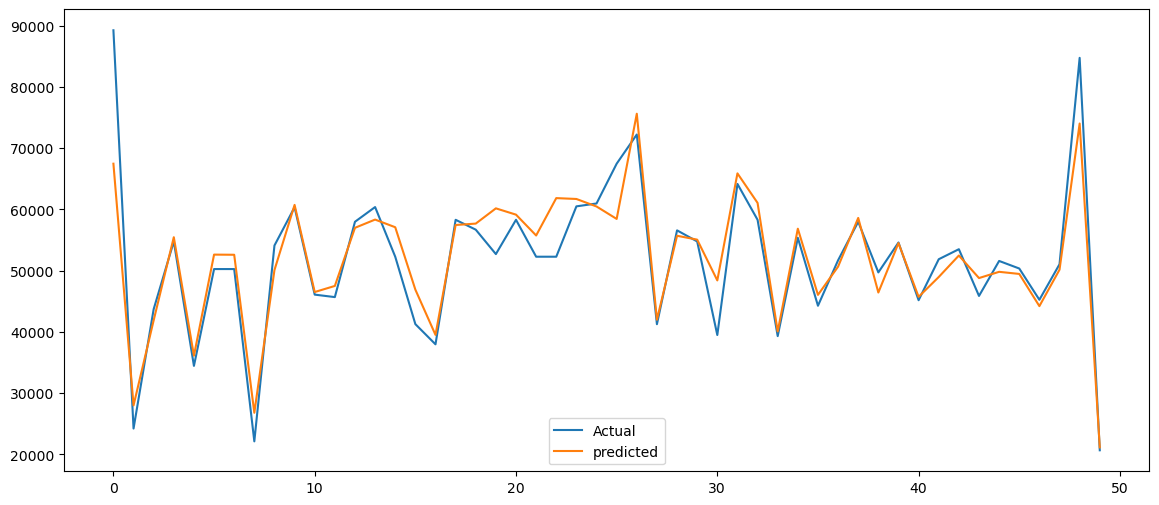

In [88]:
plt.figure(figsize=(14,6))
plt.plot(pred_xgb[:50])
plt.legend(['Actual' , 'predicted'])


In [89]:
test_y[30:31]

,price
535,39499


In [90]:
pred_xgb[30:31]

,y_test,y_pred
30,39499,48418.171875


In [91]:
df[535:536]

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,from_to
535,276989,47428.446231,50917.835008,49673.354839,51877.791667,54152.551563,48217.105105,47929.482422,6.75,45,39499,43649.937595


In [92]:
df[df['price'] == 39499]

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,from_to
129,276839,47428.446231,48419.034284,49673.354839,52719.203966,54152.551563,53388.003971,47929.482422,12.83,42,39499,43649.937595
286,276576,47428.446231,48419.034284,49673.354839,52719.203966,54152.551563,53540.326169,47929.482422,10.92,37,39499,43649.937595
312,276943,47428.446231,40603.766698,49673.354839,51715.665706,54152.551563,48217.105105,47929.482422,14.00,44,39499,43649.937595
394,274873,47428.446231,40603.766698,49673.354839,51715.665706,54152.551563,51229.746606,47929.482422,12.00,5,39499,43649.937595
498,276368,47428.446231,48419.034284,49673.354839,52719.203966,54152.551563,53540.326169,47929.482422,9.83,33,39499,43649.937595
535,276989,47428.446231,50917.835008,49673.354839,51877.791667,54152.551563,48217.105105,47929.482422,6.75,45,39499,43649.937595
631,275433,47428.446231,40603.766698,49673.354839,51715.665706,54152.551563,53388.003971,47929.482422,23.00,15,39499,43649.937595
1918,276160,47428.446231,40603.766698,49673.354839,51715.665706,54152.551563,53540.326169,47929.482422,21.08,29,39499,43649.937595
2389,276161,47428.446231,40603.766698,49673.354839,51715.665706,54152.551563,53388.003971,47929.482422,22.17,29,39499,43649.937595
2598,276578,47428.446231,48419.034284,49673.354839,52719.203966,54152.551563,53388.003971,47929.482422,12.00,37,39499,43649.937595


## PCA

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10) 
pca.fit(df)

PCA(n_components=10)

In [94]:
prop_var = pca.explained_variance_ratio_ 
eigenvalues = pca.explained_variance_

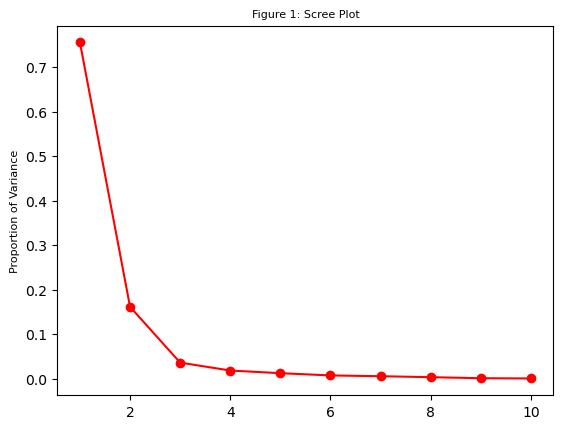

In [95]:
#строим график каменистой россыпи для определения числа главных компонент
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
 prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

In [96]:
pca = PCA(n_components = 3) 
pca.fit(df)
data_pca = pca.transform(df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca

,PC1,PC2,PC3
0,-3456.694667,18666.871089,6835.671327
1,28212.996387,5107.560634,-1297.436949
2,6815.630838,12969.826910,4892.060218
3,43712.888379,7024.624537,-3003.508119
4,6272.181397,-8277.285064,-5468.683462
...,...,...,...
5693,-21926.227296,6406.609229,462.042015
5694,-43172.756585,2184.356476,-840.130232
5695,32876.294491,4566.958005,-2096.131537
5696,-34478.324677,-4720.404328,-2652.317625


In [97]:
y = df[['price']]
scaler = StandardScaler().fit_transform(data_pca)
X = pd.DataFrame(scaler)

<AxesSubplot:>

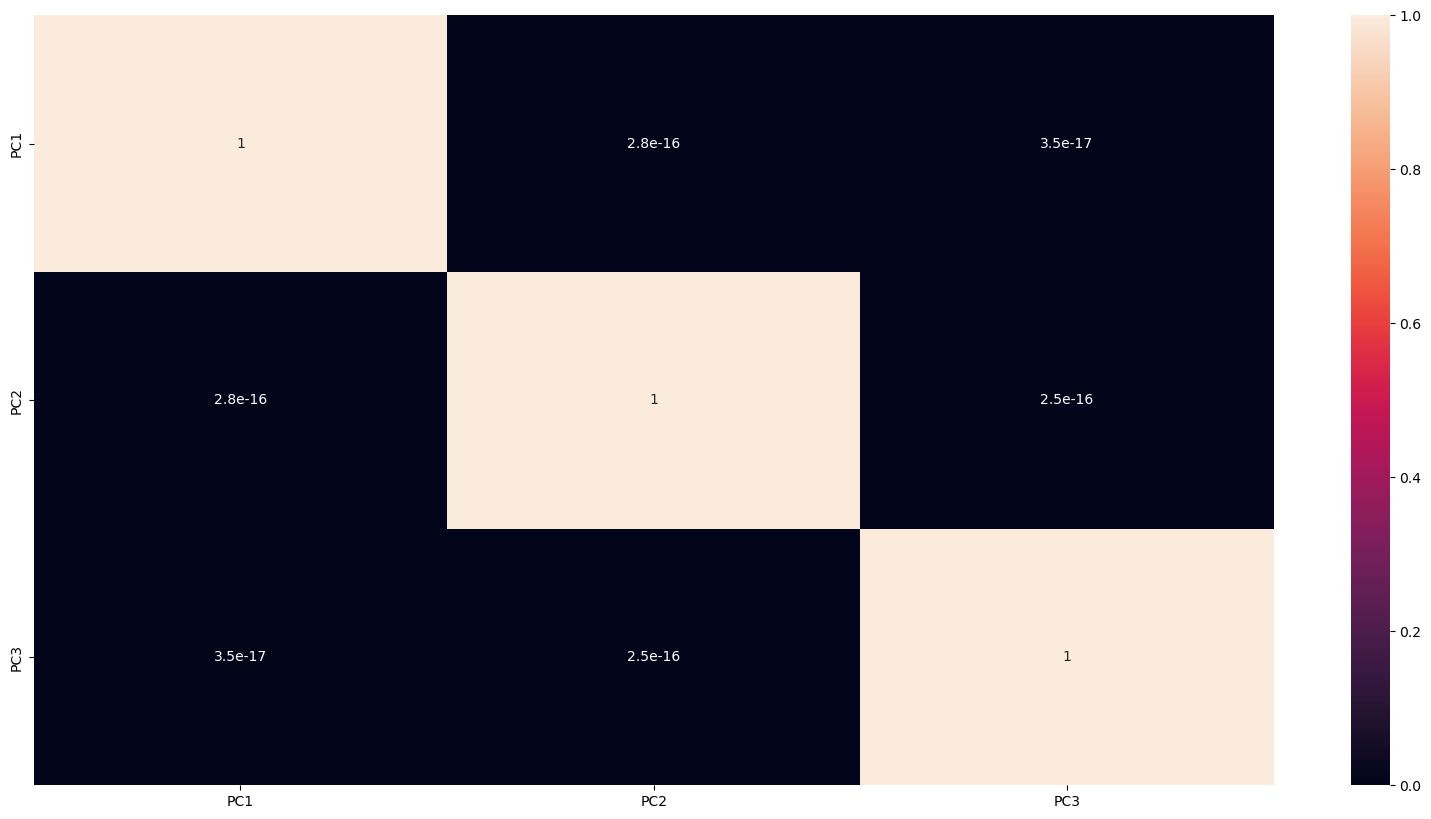

In [98]:
plt.figure(figsize=(20,10))
sns.heatmap(data_pca.corr(),annot=True)

In [99]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=0)

In [100]:
# создадим объект этого класса и запишем в переменную model
model_PCA = LinearRegression()

# обучим нашу модель
model_PCA.fit(train_X, train_y)
print(model_PCA.coef_, model_PCA.intercept_)
predictions = model_PCA.predict(test_X)

[[-3748.98330464 12399.3270375    958.55286708]] [52006.74823429]


In [101]:
mse = mean_squared_error(test_y, predictions)
rmse = mean_squared_error(test_y, predictions, squared=False)
mape = mean_absolute_percentage_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
print("Среднеквадратическая ошибка (MSE):", mse)
print("Среднеквадратическая ошибка (RMSE):", rmse)
print("Средняя абсолютная ошибка  (MAPE):", round(mape * 100, 2), '%')
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратическая ошибка (MSE): 2746935.1919916277
Среднеквадратическая ошибка (RMSE): 1657.3880631860566
Средняя абсолютная ошибка  (MAPE): 3.38 %
Коэффициент детерминации (R^2): 0.9839167633716885


In [102]:
prediction_PCA = []
for i in range(len(predictions)):
    prediction_PCA.append(float(predictions[i]))

In [103]:
pred_PCA = pd.DataFrame({"y_test":test_y['price'].tolist(), "y_pred":prediction_PCA})
pred_PCA

,y_test,y_pred
0,89257,83396.957901
1,24234,23672.938073
2,43729,43474.155554
3,54777,54968.390911
4,34460,33909.069714
...,...,...
1876,27864,25607.047731
1877,39377,38802.297944
1878,39432,39383.655029
1879,64285,66220.895363


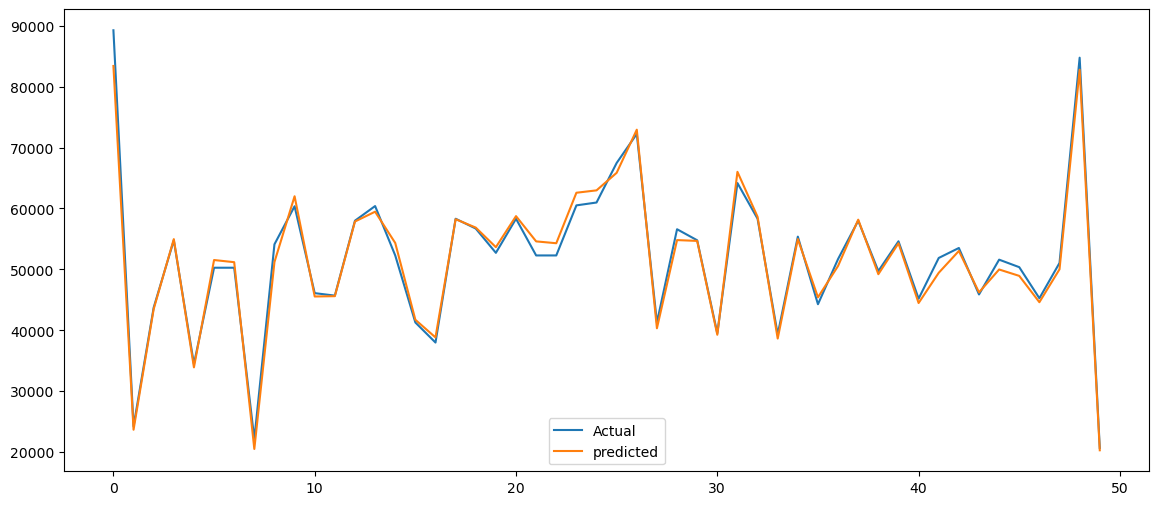

In [104]:
plt.figure(figsize=(14,6))
plt.plot(pred_PCA[:50])
plt.legend(['Actual' , 'predicted'])
